In [2]:
# As usual, let’s load the data and split the dataset into training and testing sets

import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

In [7]:
# then we use the polynomial function with degree 2

from sklearn.preprocessing import PolynomialFeatures

degree = 2
polynomial_features = PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)

# Knowing the polynomial function formula is useful when plotting the 3D hyperplane
print(polynomial_features.get_feature_names(['x','y']))

print(x_train_poly)

['1', 'x', 'y', 'x^2', 'x y', 'y^2']
[[  1.        23.98       6.459    575.0404   154.88682   41.718681]
 [  1.        21.52       6.193    463.1104   133.27336   38.353249]
 [  1.         7.74       6.75      59.9076    52.245     45.5625  ]
 ...
 [  1.        17.6        5.67     309.76      99.792     32.1489  ]
 [  1.        10.97       6.326    120.3409    69.39622   40.018276]
 [  1.         5.57       5.936     31.0249    33.06352   35.236096]]


In [16]:
# Then we can train our model using the LinearRegression class

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_poly, Y_train)

# Now let’s evaluate the model using the testing set

x_test_poly = polynomial_features.fit_transform(x_test)
print('R-Squared: %.4f\n' % model.score(x_test_poly, Y_test))

# printing out the intercept and coefficients of the polynomial function

print('intercept:    ', model.intercept_)
print('coefficients: ', model.coef_)


R-Squared: 0.7340

intercept:     26.93343052383928
coefficients:  [ 0.00000000e+00  1.47424550e+00 -6.70204730e+00  7.93570743e-04
 -3.66578385e-01  1.17188007e+00]


<IPython.core.display.Javascript object>


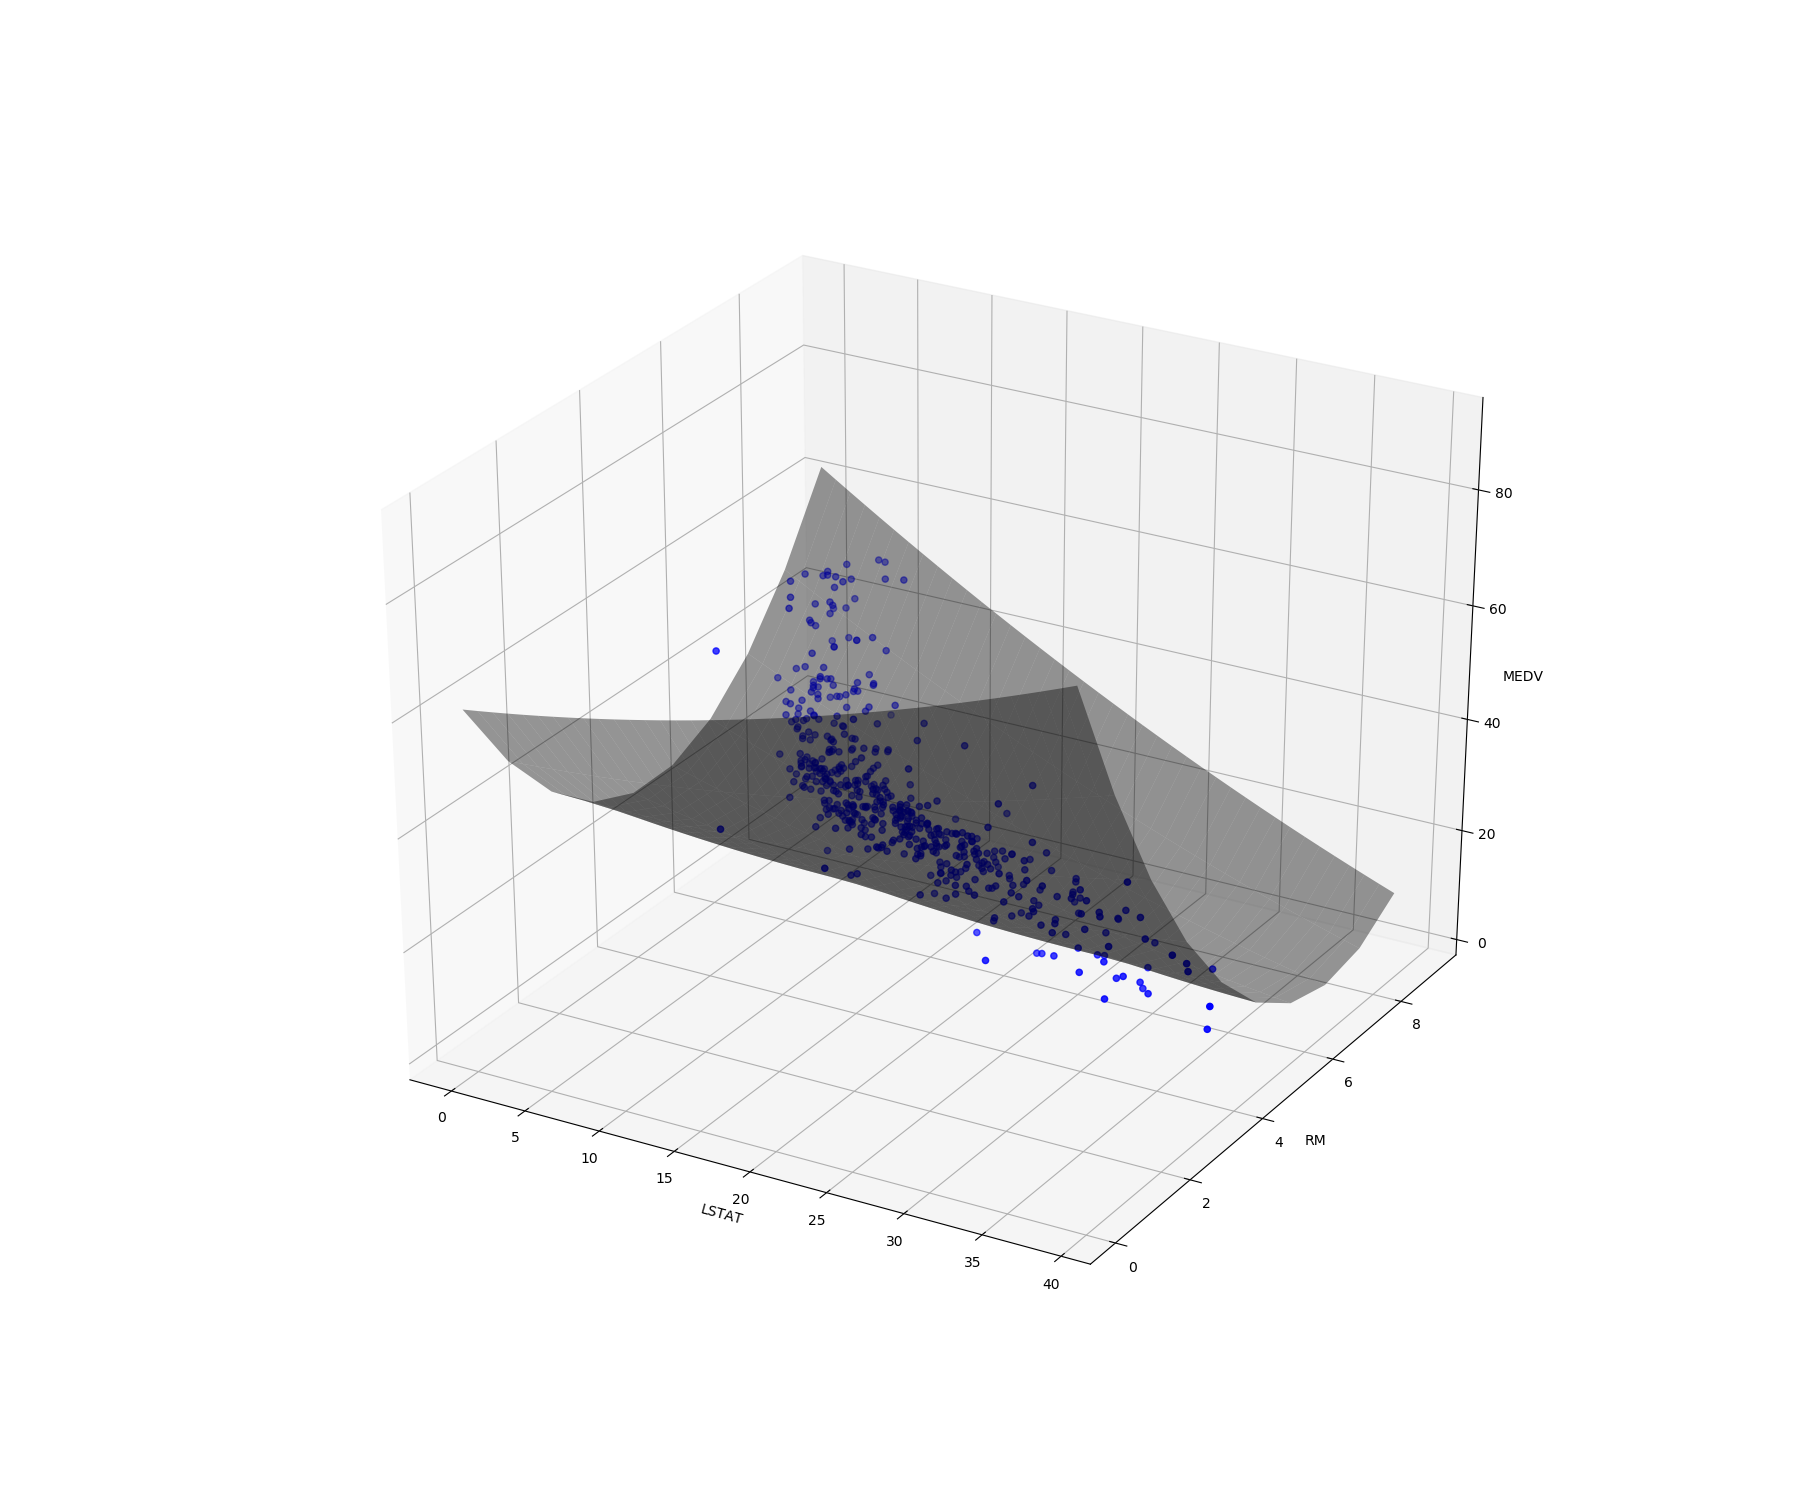

In [26]:
# Plotting the 3D Hyperplane

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'], x['RM'], Y, c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1) #---for LSTAT---
y_surf = np.arange(0, 10, 1) #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

#---use a polynomial function of degree 2---
x_poly = polynomial_features.fit_transform(x)

#---apply linear regression---
model.fit(x_poly, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ +
(model.coef_[1] * x) +
(model.coef_[2] * y) +
(model.coef_[3] * x**2) +
(model.coef_[4] * x*y) +
(model.coef_[5] * y**2))

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf), 
                rstride=1, cstride=1, 
                color='None', alpha = 0.4)
plt.show()